### 연습문제 1
- scikit-learn 문서를 참고해 cancer.csv 파일에 대해 [LinearDiscriminantAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis)를 단독으로 수행하시오

In [1]:
import os
import pandas as pd

path = r'D:\elice_python\GAS_5\pytest_machine'

os.chdir(path)

In [2]:
data = pd.read_csv('cancer.csv', header=0)
data.shape

(569, 31)

In [4]:
X= data.iloc[:,:-1]
y= data.iloc[:,-1]
print(X.shape, y.shape)

(569, 30) (569,)


In [6]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X,y, stratify=y, random_state=42)

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
pipe = make_pipeline(MinMaxScaler(), LinearDiscriminantAnalysis())
pipe.fit(X_tr,y_tr)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('lineardiscriminantanalysis', LinearDiscriminantAnalysis())])

In [12]:
pipe.get_params()

{'memory': None,
 'steps': [('minmaxscaler', MinMaxScaler()),
  ('lineardiscriminantanalysis', LinearDiscriminantAnalysis())],
 'verbose': False,
 'minmaxscaler': MinMaxScaler(),
 'lineardiscriminantanalysis': LinearDiscriminantAnalysis(),
 'minmaxscaler__clip': False,
 'minmaxscaler__copy': True,
 'minmaxscaler__feature_range': (0, 1),
 'lineardiscriminantanalysis__covariance_estimator': None,
 'lineardiscriminantanalysis__n_components': None,
 'lineardiscriminantanalysis__priors': None,
 'lineardiscriminantanalysis__shrinkage': None,
 'lineardiscriminantanalysis__solver': 'svd',
 'lineardiscriminantanalysis__store_covariance': False,
 'lineardiscriminantanalysis__tol': 0.0001}

In [13]:
pipe.score(X_te, y_te)

0.951048951048951

### 연습문제 2
- autoparts.csv 파일은 자동차 부품을 생산하면서 나온 파일이다.
- sklearn의 pipeline을 이용하여 아래를 진행하시오.

- **전처리**
    - 이 파일에서 prod_no가 90784-76001인 행만 추출하시오.
    - 추출된 데이터로 boxplot으로 이상치를 확인하고, c_thickness가 1000 미만인 행만 추출하시오.
    - 해당 행들을 autopart2.csv라는 이름으로 저장하시오

- **Pipeline**
    - autopart2.csv 파일에 대해 데이터 스케일링과 RandomForestRegressor의 pipeline을 만들고, n_estimators 값에 대한 그리드 서치를 수행하시오.

In [14]:
import os
import pandas as pd

path = r'D:\elice_python\GAS_5\pytest_machine'

os.chdir(path)

In [18]:
data = pd.read_csv('autoparts.csv', header=0)
data.head(1)

,prod_no,fix_time,a_speed,b_speed,separation,s_separation,rate_terms,mpa,load_time,highpressure_time,c_thickness
0,90784-76001,85.5,0.611,1.715,242.0,657.6,95,78.2,18.1,58,24.7


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34139 entries, 0 to 34138
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   prod_no            34139 non-null  object 
 1   fix_time           34139 non-null  float64
 2   a_speed            34139 non-null  float64
 3   b_speed            34139 non-null  float64
 4   separation         34139 non-null  float64
 5   s_separation       34139 non-null  float64
 6   rate_terms         34139 non-null  int64  
 7   mpa                34139 non-null  float64
 8   load_time          34139 non-null  float64
 9   highpressure_time  34139 non-null  int64  
 10  c_thickness        34139 non-null  float64
dtypes: float64(8), int64(2), object(1)
memory usage: 2.9+ MB


In [30]:
sample = data[data.prod_no == '90784-76001']
sample.head()

,prod_no,fix_time,a_speed,b_speed,separation,s_separation,rate_terms,mpa,load_time,highpressure_time,c_thickness
0,90784-76001,85.5,0.611,1.715,242.0,657.6,95,78.2,18.1,58,24.7
1,90784-76001,86.2,0.606,1.708,244.7,657.1,95,77.9,18.2,58,22.5
2,90784-76001,86.0,0.609,1.715,242.7,657.5,95,78.0,18.1,82,24.1
3,90784-76001,86.1,0.610,1.718,241.9,657.3,95,78.2,18.1,74,25.1
4,90784-76001,86.1,0.603,1.704,242.5,657.3,95,77.9,18.2,56,24.5


In [31]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21779 entries, 0 to 34138
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   prod_no            21779 non-null  object 
 1   fix_time           21779 non-null  float64
 2   a_speed            21779 non-null  float64
 3   b_speed            21779 non-null  float64
 4   separation         21779 non-null  float64
 5   s_separation       21779 non-null  float64
 6   rate_terms         21779 non-null  int64  
 7   mpa                21779 non-null  float64
 8   load_time          21779 non-null  float64
 9   highpressure_time  21779 non-null  int64  
 10  c_thickness        21779 non-null  float64
dtypes: float64(8), int64(2), object(1)
memory usage: 2.0+ MB


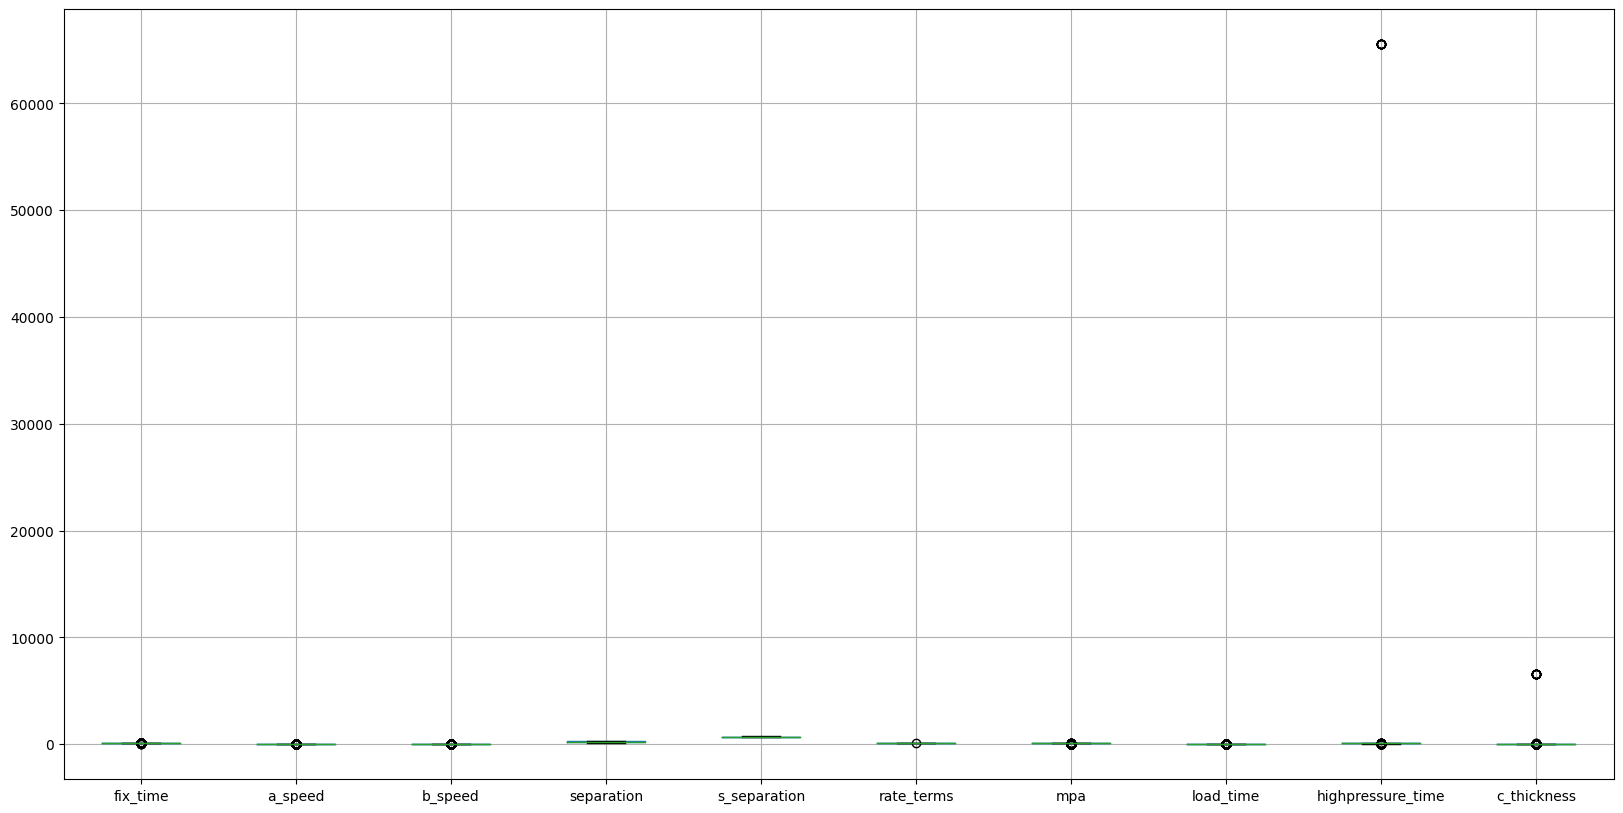

In [42]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(20,10))
sample.boxplot(figsize=(20,10))
plt.show()

In [43]:
sample_selected = sample[sample['c_thickness']<1000]
sample_selected.shape

(21767, 11)

In [44]:
sample_selected.to_csv(os.path.join(path,'autoparts_selected.csv'))

In [48]:
data = pd.read_csv('autoparts_selected.csv', header=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21767 entries, 0 to 21766
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         21767 non-null  int64  
 1   prod_no            21767 non-null  object 
 2   fix_time           21767 non-null  float64
 3   a_speed            21767 non-null  float64
 4   b_speed            21767 non-null  float64
 5   separation         21767 non-null  float64
 6   s_separation       21767 non-null  float64
 7   rate_terms         21767 non-null  int64  
 8   mpa                21767 non-null  float64
 9   load_time          21767 non-null  float64
 10  highpressure_time  21767 non-null  int64  
 11  c_thickness        21767 non-null  float64
dtypes: float64(8), int64(3), object(1)
memory usage: 2.0+ MB


In [49]:
X = data.iloc[:,2:-1]
y = data.iloc[:,-1]
X.shape, y.shape

((21767, 9), (21767,))

In [53]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

X_tr, X_te, y_tr, y_te = train_test_split(X,y, random_state=42)

pipe = make_pipeline(MinMaxScaler(), RandomForestRegressor())
print(pipe.get_params)

<bound method Pipeline.get_params of Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestregressor', RandomForestRegressor())])>


In [58]:
grid_param = {
    'randomforestregressor__n_estimators' : [10, 20, 30]
}
grid_scv = GridSearchCV(estimator=pipe, param_grid=grid_param, cv=5, n_jobs=-1)

In [59]:
grid_scv.fit(X_tr, y_tr)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 20, 30]})

In [61]:
grid_scv.score(X_te,y_te)

0.9143028964554516